<a href="https://colab.research.google.com/github/saiffardin/pytorch/blob/main/03_saif_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

from torch.utils.data import random_split
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

# Loading MNIST dataset

In [ ]:
# MNIST dataset (images and labels)
train_dataset = MNIST(root='data/',
                download=True, 
                train=True,
                transform=transforms.ToTensor())

test_dataset = MNIST(root='data/', train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
print(len(train_dataset))
print(len(test_dataset))

60000
10000


In [ ]:
train_dataset[0]

In [ ]:
img,label = train_dataset[0]

In [ ]:
print(img.size())
print(label)

torch.Size([1, 28, 28])
5


In [ ]:
show_img = img.reshape(28,28)
print(show_img.size())

torch.Size([28, 28])


Label: 5


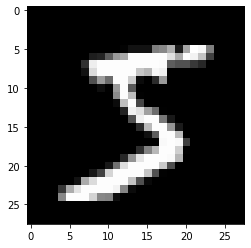

In [ ]:
plt.imshow(show_img, cmap='gray')
print('Label:', label)

Label: 5


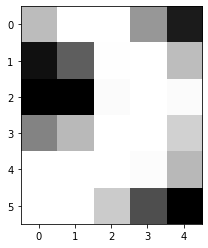

In [ ]:
plt.imshow(show_img[15:21,15:20], cmap='gray')
print('Label:', label)

# Training and Validation Datasets

In [ ]:
train_ds, val_ds = random_split(train_dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
# DataLoader -> splits the dataset into batches

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

We set `shuffle=True` for the training data loader to ensure that the batches generated in each epoch are different. This randomization helps generalize & speed up the training process. On the other hand, since the validation data loader is used only for evaluating the model, there is no need to shuffle the images. 


In [ ]:
print(f"batch size:{batch_size}")

print(f"train_ds:{len(train_ds)} \t train_loader:{len(train_loader)}")
print(f"val_ds:{len(val_ds)} \t val_loader:{len(val_loader)}")

batch size:128
train_ds:50000 	 train_loader:391
val_ds:10000 	 val_loader:79


# Model (Single Batch)

## A Linear Model

In [ ]:
input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [ ]:
print(model.weight.shape)
# model.weight

torch.Size([10, 784])


In [ ]:
print(model.bias.shape)
# model.bias

torch.Size([10])


## Working with a Single Batch

In [ ]:
print(images.shape)
print(labels.size())
print(labels)

torch.Size([128, 1, 28, 28])
torch.Size([128])
tensor([1, 3, 6, 3, 0, 7, 3, 8, 3, 9, 4, 5, 2, 9, 5, 4, 1, 9, 3, 5, 7, 2, 2, 9,
        8, 1, 0, 1, 5, 1, 8, 7, 5, 7, 3, 6, 0, 2, 2, 4, 6, 2, 7, 5, 7, 3, 9, 5,
        1, 6, 5, 7, 9, 4, 7, 0, 8, 9, 0, 0, 3, 1, 5, 1, 7, 8, 5, 8, 6, 3, 6, 3,
        7, 9, 8, 9, 4, 3, 2, 4, 1, 7, 1, 9, 7, 8, 5, 3, 6, 3, 7, 0, 8, 6, 8, 0,
        3, 4, 9, 6, 5, 3, 6, 9, 1, 5, 1, 6, 7, 7, 4, 5, 2, 6, 7, 9, 9, 6, 5, 2,
        1, 0, 3, 7, 2, 5, 9, 7])


In [ ]:
outputs = torch.tensor([])

for i,img in enumerate(images):
    img = img.reshape(-1,28*28)
    # print(i,img.shape)

    op = model(img)
    outputs = torch.cat((outputs,op), 0)

In [ ]:
print(outputs.size())  

torch.Size([128, 10])


In [ ]:
outputs

tensor([[-0.0526,  0.0897, -0.0563,  ...,  0.1054,  0.0216, -0.1916],
        [ 0.1677, -0.1418, -0.0254,  ...,  0.2466,  0.0077, -0.4364],
        [ 0.1279,  0.1540, -0.2837,  ...,  0.3508, -0.3807, -0.2283],
        ...,
        [-0.1288,  0.1303, -0.0166,  ...,  0.1493, -0.0029, -0.3932],
        [ 0.3172,  0.6046, -0.2356,  ...,  0.6865, -0.5101, -0.1360],
        [ 0.0570,  0.0858, -0.0202,  ...,  0.0465, -0.1390, -0.2741]],
       grad_fn=<CatBackward>)

In [ ]:
outputs[:5]

tensor([[-0.0526,  0.0897, -0.0563,  0.1824, -0.1651, -0.1363,  0.0760,  0.1054,
          0.0216, -0.1916],
        [ 0.1677, -0.1418, -0.0254,  0.0594,  0.0016,  0.2575, -0.0829,  0.2466,
          0.0077, -0.4364],
        [ 0.1279,  0.1540, -0.2837,  0.2259, -0.0663,  0.1243, -0.0512,  0.3508,
         -0.3807, -0.2283],
        [ 0.0337,  0.1056,  0.0429,  0.0839, -0.2607,  0.1994,  0.0632,  0.3069,
          0.0040, -0.5070],
        [ 0.1809,  0.1988, -0.1053,  0.1803,  0.2213,  0.4027,  0.0524,  0.2882,
         -0.0181, -0.3330]], grad_fn=<SliceBackward>)

## Softmax Func

In [ ]:
first_5_outputs = outputs[:5]

# Apply softmax for each output row
first_5_probs = F.softmax(first_5_outputs, dim=1)

In [ ]:
len(first_5_probs)

5

In [ ]:
max_el, el_indx = torch.max(first_5_probs[4].data,dim=0)
print(max_el,el_indx)

tensor(0.1318) tensor(5)


In [ ]:
# getting prediction of all 5 output images at once
max_el, preds = torch.max(first_5_probs,dim=1)

In [ ]:
preds

tensor([3, 5, 7, 7, 5])

In [ ]:
labels[:5]

tensor([1, 3, 6, 3, 0])

##Accuracy

In [ ]:
preds == labels[:5]

tensor([False, False, False, False, False])

In [ ]:
torch.sum(preds == labels[:5]).item()

0

In [ ]:
def accuracy(preds, labels):
    sum = torch.sum(preds == labels).item()
    return torch.tensor( sum / len(preds))

In [ ]:
accuracy(preds,labels[:5])

tensor(0.)

##Cross Entropy

In [ ]:
first_5_outputs.data

tensor([[-0.0526,  0.0897, -0.0563,  0.1824, -0.1651, -0.1363,  0.0760,  0.1054,
          0.0216, -0.1916],
        [ 0.1677, -0.1418, -0.0254,  0.0594,  0.0016,  0.2575, -0.0829,  0.2466,
          0.0077, -0.4364],
        [ 0.1279,  0.1540, -0.2837,  0.2259, -0.0663,  0.1243, -0.0512,  0.3508,
         -0.3807, -0.2283],
        [ 0.0337,  0.1056,  0.0429,  0.0839, -0.2607,  0.1994,  0.0632,  0.3069,
          0.0040, -0.5070],
        [ 0.1809,  0.1988, -0.1053,  0.1803,  0.2213,  0.4027,  0.0524,  0.2882,
         -0.0181, -0.3330]])

In [ ]:
loss_fn = F.cross_entropy

# Loss for current batch of data
loss = loss_fn(first_5_outputs, labels[:5])

In [ ]:
print(loss.data)

tensor(2.2692)


## Making Things Better (GD)

In [ ]:
loss

tensor(2.2692, grad_fn=<NllLossBackward>)

In [ ]:
# calculates the gradients 
loss.backward()

In [ ]:
model_params  = model.parameters()
learning_rate = 0.001

optimizer = torch.optim.SGD(model_params,learning_rate)

# updating the weights and biases
optimizer.step()

## Second Time Training

In [ ]:
print(images.shape)
print(labels.size())
print(labels)

torch.Size([128, 1, 28, 28])
torch.Size([128])
tensor([1, 3, 6, 3, 0, 7, 3, 8, 3, 9, 4, 5, 2, 9, 5, 4, 1, 9, 3, 5, 7, 2, 2, 9,
        8, 1, 0, 1, 5, 1, 8, 7, 5, 7, 3, 6, 0, 2, 2, 4, 6, 2, 7, 5, 7, 3, 9, 5,
        1, 6, 5, 7, 9, 4, 7, 0, 8, 9, 0, 0, 3, 1, 5, 1, 7, 8, 5, 8, 6, 3, 6, 3,
        7, 9, 8, 9, 4, 3, 2, 4, 1, 7, 1, 9, 7, 8, 5, 3, 6, 3, 7, 0, 8, 6, 8, 0,
        3, 4, 9, 6, 5, 3, 6, 9, 1, 5, 1, 6, 7, 7, 4, 5, 2, 6, 7, 9, 9, 6, 5, 2,
        1, 0, 3, 7, 2, 5, 9, 7])


In [ ]:
outputs = torch.tensor([])

# linear regression
for i,img in enumerate(images):
    img = img.reshape(-1,28*28)

    op = model(img)
    outputs = torch.cat((outputs,op), 0)

# selecting first 5 outputs
first_5_outputs = outputs[:5]

# Apply softmax for each output row
first_5_probs = F.softmax(first_5_outputs, dim=1)

# getting prediction of all 5 output images at once
max_el, preds = torch.max(first_5_probs,dim=1)

In [ ]:
preds

tensor([3, 5, 7, 7, 5])

In [ ]:
labels[:5]

tensor([1, 3, 6, 3, 0])

In [ ]:
accuracy(preds,labels[:5])

tensor(0.)

In [ ]:
# Loss for current batch of data
loss = loss_fn(first_5_outputs, labels[:5])

In [ ]:
print(loss.data)
# previous cross entropy was - 2.2692

tensor(2.2527)


## Trainging Third time with 128 images

In [ ]:
outputs = torch.tensor([])

# linear regression
for i,img in enumerate(images):
    img = img.reshape(-1,28*28)

    op = model(img)
    outputs = torch.cat((outputs,op), 0)

# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# getting prediction of all 128 images at once
max_el, preds = torch.max(probs,dim=1)

In [ ]:
preds

tensor([3, 5, 7, 7, 5, 7, 1, 7, 7, 1, 1, 3, 1, 0, 6, 1, 7, 7, 7, 3, 7, 1, 2, 1,
        1, 6, 2, 3, 7, 7, 7, 1, 7, 0, 4, 3, 1, 2, 7, 7, 7, 2, 7, 2, 7, 3, 7, 0,
        7, 5, 1, 7, 7, 1, 0, 7, 7, 7, 5, 7, 0, 3, 7, 7, 3, 7, 1, 7, 7, 0, 7, 4,
        1, 1, 1, 1, 1, 1, 7, 3, 7, 7, 6, 7, 0, 7, 1, 0, 7, 7, 7, 0, 7, 3, 7, 2,
        1, 7, 7, 3, 2, 0, 7, 3, 3, 7, 1, 7, 0, 7, 0, 0, 7, 2, 0, 1, 0, 5, 6, 0,
        3, 5, 7, 7, 3, 5, 3, 1])

In [ ]:
labels

tensor([1, 3, 6, 3, 0, 7, 3, 8, 3, 9, 4, 5, 2, 9, 5, 4, 1, 9, 3, 5, 7, 2, 2, 9,
        8, 1, 0, 1, 5, 1, 8, 7, 5, 7, 3, 6, 0, 2, 2, 4, 6, 2, 7, 5, 7, 3, 9, 5,
        1, 6, 5, 7, 9, 4, 7, 0, 8, 9, 0, 0, 3, 1, 5, 1, 7, 8, 5, 8, 6, 3, 6, 3,
        7, 9, 8, 9, 4, 3, 2, 4, 1, 7, 1, 9, 7, 8, 5, 3, 6, 3, 7, 0, 8, 6, 8, 0,
        3, 4, 9, 6, 5, 3, 6, 9, 1, 5, 1, 6, 7, 7, 4, 5, 2, 6, 7, 9, 9, 6, 5, 2,
        1, 0, 3, 7, 2, 5, 9, 7])

In [ ]:
accuracy(preds,labels)
# previous accuracy was - 0

tensor(0.1250)

In [ ]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)

print(loss.data)
# previous cross entropy was - 2.2527 (with 5 images)

tensor(2.2961)


In [ ]:
loss_val = round(loss.item(),4)
print(loss_val)

2.2961


## Trainging with LOOP

In [ ]:
def fit_single_batch (iteration,learning_rate):
    for it in range(iteration):

        outputs = torch.tensor([])

        # linear regression
        for i,img in enumerate(images):
            img = img.reshape(-1,28*28)

            op = model(img)
            outputs = torch.cat((outputs,op), 0)


        # Apply softmax for each output row
        probs = F.softmax(outputs, dim=1)

        # getting prediction of all 128 images at once
        max_el, preds = torch.max(probs,dim=1)

        acc_tensor = accuracy(preds,labels)
        loss_tensor = loss_fn(outputs, labels)

        # calculates the gradients 
        loss_tensor.backward()

        # initializing optimizer
        optimizer = torch.optim.SGD(model.parameters(),learning_rate)

        # updating the weights and biases
        optimizer.step()

        # clearing prev weights and biases
        optimizer.zero_grad()

        # print after each 100 iterations
        if it%100==0:
            loss_val = round(loss_tensor.item(),4)
            acc_val  = round(acc_tensor.item(),4) 

            print(f"iteration: {it} \t acc: {acc_val} \t loss: {loss_val}") 

In [ ]:
iteration = 1000
learning_rate = 0.001

fit_single_batch (iteration,learning_rate)

iteration: 0 	 acc: 0.9688 	 loss: 0.5754
iteration: 100 	 acc: 0.9688 	 loss: 0.564
iteration: 200 	 acc: 0.9688 	 loss: 0.5529
iteration: 300 	 acc: 0.9688 	 loss: 0.5423
iteration: 400 	 acc: 0.9688 	 loss: 0.532
iteration: 500 	 acc: 0.9688 	 loss: 0.5221
iteration: 600 	 acc: 0.9766 	 loss: 0.5125
iteration: 700 	 acc: 0.9766 	 loss: 0.5033
iteration: 800 	 acc: 0.9844 	 loss: 0.4943
iteration: 900 	 acc: 0.9844 	 loss: 0.4856
iteration: 999 	 acc: 0.9844 	 loss: 0.4856


# Model (Full)

## MnistModel - Class

In [ ]:
input_size = 28*28
num_classes= 10

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
    
        return {'val_loss': loss}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result):
        print(f"Epoch [{epoch}], val_loss: {result['val_loss']:.4f}")
    





    
model = MnistModel()

Inside the `__init__` constructor method, we instantiate the weights and biases using `nn.Linear`. And inside the `forward` method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into `self.linear`.

`xb.reshape(-1, 28*28)` indicates to PyTorch that we want a *view* of the `xb` tensor with two dimensions. The length along the 2nd dimension is 28\*28 (i.e., 784). One argument to `.reshape` can be set to `-1` (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

Note that the model no longer has `.weight` and `.bias` attributes (as they are now inside the `.linear` attribute), but it does have a `.parameters` method that returns a list containing the weights and bias.

## Fit - func

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

## Evaluate - func

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

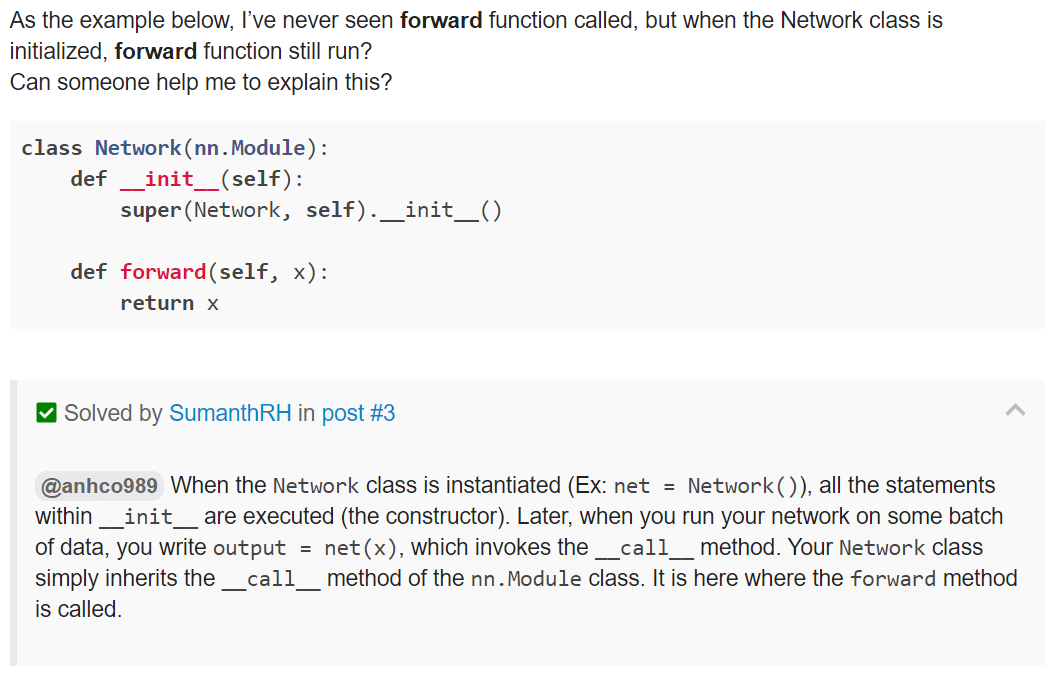

## Logistic Regression

In [ ]:
fit(epochs=1000, lr=0.001, model=model, train_loader=train_loader, val_loader=val_loader)

Epoch [0], val_loss: 1.9427
Epoch [1], val_loss: 1.6756
Epoch [2], val_loss: 1.4751
Epoch [3], val_loss: 1.3231
Epoch [4], val_loss: 1.2059
Epoch [5], val_loss: 1.1137
Epoch [6], val_loss: 1.0395
Epoch [7], val_loss: 0.9788
